In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
#Load other modules
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
#To show graphs within the notebook
%matplotlib inline 

In [3]:
#load the datasets
train = pd.read_csv("train.csv")

In [4]:
#Printing the size of the dataframe
print ("Training dataset has %i observations and %i variables" %(train.shape[0], train.shape[1]))

Training dataset has 42000 observations and 785 variables


In [5]:
#check few rows
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Seperate the target and independant variables
df_x=train.iloc[:,1:]
df_y=train.iloc[:,0]

In [7]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(33600, 784)
(8400, 784)


In [8]:
from sklearn.metrics import zero_one_loss, mean_squared_error

In [9]:
#training random Forest
def random_forest(max_leaf, estimator):
    rf=RandomForestClassifier(max_leaf_nodes=max_leaf, n_estimators=estimator)
    rf.fit(X_train,y_train)
    pred_train=rf.predict(X_train)
    pred_test=rf.predict(X_test)
    train = (mean_squared_error(y_train, pred_train), zero_one_loss(y_train, pred_train))
    test = (mean_squared_error(y_test, pred_test), zero_one_loss(y_test, pred_test))
    return train, test

In [10]:
output = []
for max_leaf in [10, 250, 500, 750, 1000, 2000]:
    output.append(((max_leaf,1),random_forest(max_leaf, 1)))
for estimator in [1, 2, 3, 5, 10, 15, 20]:
    output.append(((2000,estimator), random_forest(2000, estimator)))

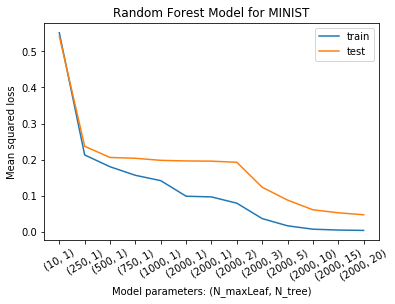

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(len(output)), [output[i][1][0][1] for i in range(len(output))], label = 'train')
plt.plot(range(len(output)), [output[i][1][1][1] for i in range(len(output))], label = 'test')
plt.axis()
plt.xticks([i for i in range(len(output))], [output[i][0] for i in range(len(output))], rotation=30)
plt.xlabel('Model parameters: (N_maxLeaf, N_tree)')
plt.ylabel('Mean squared loss')
plt.title('Random Forest Model for MINIST')
plt.legend();

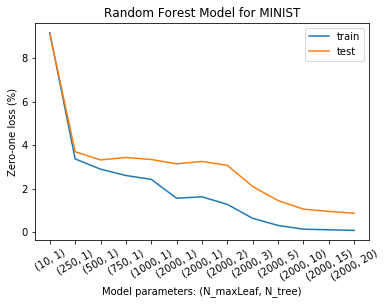

In [12]:
plt.plot(range(len(output)), [output[i][1][0][0] for i in range(len(output))], label = 'train')
plt.plot(range(len(output)), [output[i][1][1][0] for i in range(len(output))], label = 'test')
plt.axis()
plt.xticks([i for i in range(len(output))], [output[i][0] for i in range(len(output))], rotation=30)
plt.xlabel('Model parameters: (N_maxLeaf, N_tree)')
plt.ylabel('Zero-one loss (%)')
plt.title('Random Forest Model for MINIST')
plt.legend();

Ref:

https://www.kaggle.com/ashwani07/mnist-classification-using-random-forest/data?select=train.csv